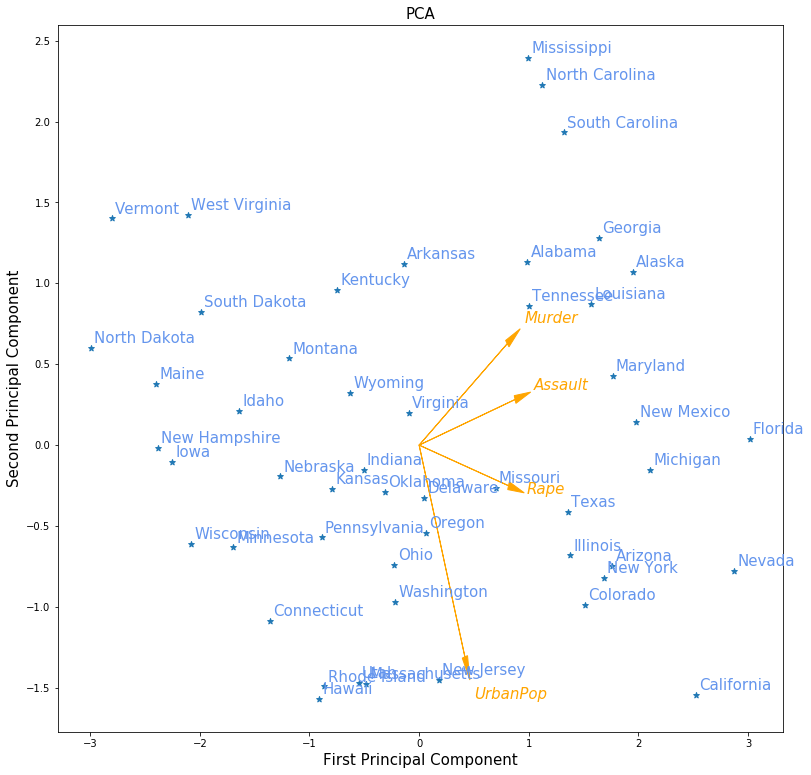

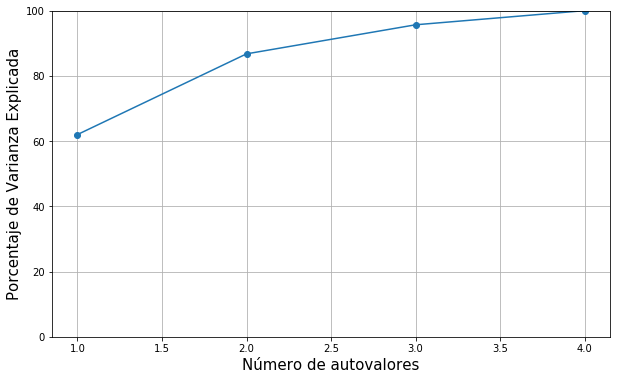

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('Datos/USArrests.csv')
columns = ['Murder', 'Assault', 'UrbanPop', 'Rape']
cities = data['Unnamed: 0']
X = np.array(data[columns])

for i in range(np.shape(X)[1]):
    X[:,i] = (X[:,i] - np.mean(X[:,i])) / np.std(X[:,i])

S = np.zeros(np.shape(X)[1])
for i in X:
    S = S + np.outer(i,i)
S = (1/(len(X))) * S
w, v = np.linalg.eig(S)
vec1 = v[:,np.flipud(np.argsort(w))[0]]
vec2 = v[:,np.flipud(np.argsort(w))[1]]

pc = np.zeros(len(X))
sc = np.zeros(len(X))
for i in range(len(X)):
    pc[i], sc[i] = [vec1 @ X[i,:], vec2 @ X[i,:]]

plt.figure(figsize = (13,13))
plt.scatter(pc, sc, marker='*')
for x, y, text in zip(pc, sc, cities):
    plt.text(x + 0.03, y + 0.03, text, color = 'cornflowerblue', fontsize = 15)
for i in range(np.shape(X)[1]):
    plt.arrow(0, 0, vec1[i] * 1.5, vec2[i] * 1.5, color = 'orange',head_width=0.05, head_length=0.15)
    plt.text(vec1[i] * 1.8, vec2[i] * 1.8, columns[i], fontsize=15, color='orange', style = 'italic')    
plt.xlabel('First Principal Component',fontsize = 15)
plt.ylabel('Second Principal Component',fontsize = 15)
plt.title('PCA', fontsize = 15)
#plt.savefig('arrestos.png')
plt.show()

w = np.flipud(np.sort(w))
var = 100 * np.cumsum(w)/np.sum(w)

plt.figure(figsize = (10,6))
plt.plot(range(1, 5), var, marker='o')
plt.ylim(0, 100)
plt.grid()
plt.xlabel('Número de autovalores', fontsize = 15)
plt.ylabel('Porcentaje de Varianza Explicada', fontsize = 15)
#plt.savefig('varianza_arrestos.png')
plt.show()




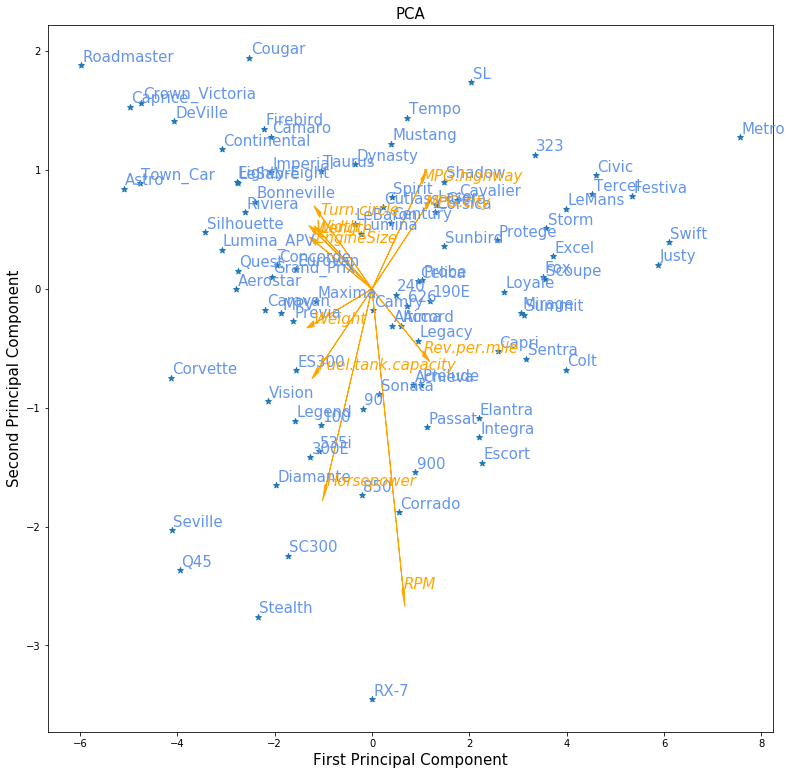

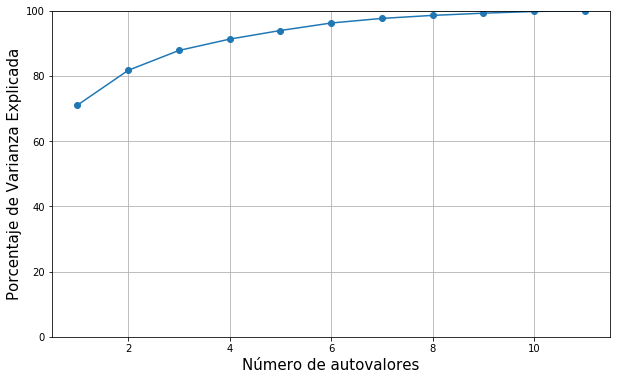

In [11]:
data = pd.read_csv('Datos/Cars93.csv')
columns = ['MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 
          'Fuel.tank.capacity', 'Length', 'Width', 'Turn.circle', 'Weight']
X = np.array(data[columns])
cars = data['Model']

for i in range(np.shape(X)[1]):
    X[:,i] = (X[:,i] - np.mean(X[:,i])) / np.std(X[:,i])

S = np.zeros(np.shape(X)[1])
for i in X:
    S = S + np.outer(i,i)
S = (1/(len(X))) * S
w, v = np.linalg.eig(S)
vec1 = v[:,np.flipud(np.argsort(w))[0]]
vec2 = -v[:,np.flipud(np.argsort(w))[1]]

pc = np.zeros(len(X))
sc = np.zeros(len(X))
for i in range(len(X)):
    pc[i], sc[i] = [vec1 @ X[i,:], vec2 @ X[i,:]]

plt.figure(figsize = (13,13))
plt.scatter(pc, sc, marker='*')
for x, y, text in zip(pc, sc, cars):
    plt.text(x + 0.03, y + 0.03, text, color = 'cornflowerblue', fontsize = 15)
for i in range(np.shape(X)[1]):
    plt.arrow(0, 0, vec1[i] * 3.5, vec2[i] * 3.5, color = 'orange',head_width=0.05, head_length=0.15)
    plt.text(vec1[i] * 3.5, vec2[i] * 3.5, columns[i], fontsize=15, color='orange', style = 'italic')    
plt.xlabel('First Principal Component',fontsize = 15)
plt.ylabel('Second Principal Component',fontsize = 15)
plt.title('PCA', fontsize = 15)
#plt.savefig('cars.png')
plt.show()


w = np.flipud(np.sort(w))
var = 100 * np.cumsum(w)/np.sum(w)

plt.figure(figsize = (10, 6))
plt.plot(range(1, 12), var, marker='o')
plt.ylim(0, 100)
plt.grid()
plt.xlabel('Número de autovalores', fontsize = 15)
plt.ylabel('Porcentaje de Varianza Explicada', fontsize = 15)
#plt.savefig('varianza_cars.png')
plt.show()